# Breast Cancer Data Set
This dataset contains the characteristics of patients diagnosed with cancer. The dataset contains a unique ID for each patient, the type of cancer (diagnosis), the visual characteristics of the cancer and the average values of these characteristics.

The main features of the dataset are as follows:
id: Represents a unique ID of each patient.

diagnosis: Indicates the type of cancer. This property can take the values "M" (Malignant - Benign) or "B" (Benign - Malignant).

radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: Represents the mean values of the cancer's visual characteristics.

Tasks : 

- Logistic Regression: This algorithm can be used effectively for binary classification problems. In this dataset, logistic regression may be an appropriate choice since there are "Malignant" (benign) and "Benign" (malignant) classes. It can be used to predict cancer type with the visual features in the dataset.

- K-Nearest Neighbors (KNN): KNN classifies an example by looking at the k closest examples around it. This algorithm assumes that patients with similar characteristics tend to have similar types of cancer. KNN can be used for cancer diagnosis by taking into account neighborhood relationships in the data set.

- Support Vector Machines (SVM): SVM is effective for classification tasks, especially for two-class problems. Focusing on the clear separation of classes in the dataset, SVM is a powerful algorithm that can be used for cancer diagnosis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from svm_margin_plot import plot_svm_boundary

data = pd.read_csv('./Datasets/Cancer_Data.csv')
print(data.sample(10))

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
281   8912055         B        11.74         14.02           74.24      427.3   
515    916221         B        11.34         18.61           72.76      391.2   
511    915664         B        14.81         14.70           94.66      680.7   
240  88350402         B        13.64         15.60           87.38      575.3   
16     848406         M        14.68         20.13           94.74      684.5   
306     89344         B        13.20         15.82           84.07      537.3   
512    915691         M        13.40         20.52           88.64      556.7   
299    892399         B        10.51         23.09           66.85      334.2   
17   84862001         M        16.13         20.68          108.10      798.8   
167   8712729         M        16.78         18.80          109.30      886.3   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
281          0.07813         

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [4]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data = data.drop(['Unnamed: 32' , 'id'] , axis=1 )

- Encoding

In [6]:
data['diagnosis'] = data['diagnosis'].map({'M': 1 , 'B': 0})

- Checking Correlation between features and label

In [7]:
data.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

- Dropping features with negative correlations

In [8]:
data = data.drop(['smoothness_se' , 'fractal_dimension_mean' , 'texture_se' , 'symmetry_se'] , axis=1)

- Checking for Balance of dataset

diagnosis
0    357
1    212
Name: count, dtype: int64


<Axes: ylabel='count'>

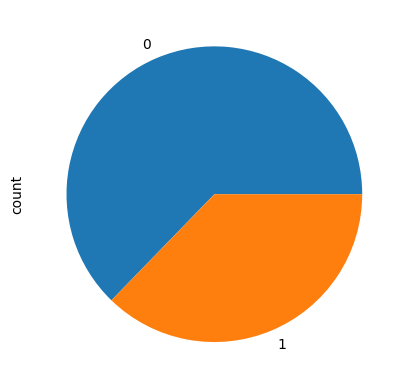

In [9]:
print(data['diagnosis'].value_counts())
data['diagnosis'].value_counts().plot.pie() # pandas in-built function to visualize a pie-chart

- Data Prepration

In [10]:
X = data.drop('diagnosis' , axis=1)
y = data['diagnosis']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", message="l1_ratio parameter is only used when penalty is 'elasticnet'")

Model = LogisticRegression(solver='saga' , max_iter=10000)

params_grid = {
    'l1_ratio' : [0.1 , 0.2 , 0.3 , 0.4 , 0.5],
    'penalty':['l1' , 'l2' , 'elasticnet'],
    'C': [0.1 , 0.2 , 0.3 , 0.4 , 0.5],
}

GridSearch_log = GridSearchCV(estimator=Model , param_grid=params_grid , cv=10)
GridSearch_log.fit(X_train , y_train)

# Best Parameters for the Model
print(GridSearch_log.best_params_)

{'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2'}


- Testing for Logistic Regression

In [12]:
from sklearn.metrics import classification_report , confusion_matrix

y_pred = GridSearch_log.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[108   0]
 [  2  61]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       108
           1       1.00      0.97      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



- Got pretty well-suited model

- Trying KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

GridSearch_KNN = GridSearchCV(estimator=KNeighborsClassifier() , param_grid={ 'n_neighbors':[x for x in range(1 , 30)]} , cv=10)
GridSearch_KNN.fit(X_train , y_train)

# Best Parameters for the Model
print(GridSearch_KNN.best_params_)

{'n_neighbors': 3}


- Testing for KNN

In [14]:
y_pred = GridSearch_KNN.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[106   2]
 [  4  59]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



- KNN performed well too

- Trying Support Vector Classifier

In [15]:
from sklearn.svm import SVC

GridSearch_SVC = GridSearchCV(
                            estimator=SVC() , 
                              param_grid={ 
                                  'kernel':['linear' , 'rbf' , 'poly' ] ,
                                  'gamma':[0.1 , 0.2 , 0.3 , 0.4 , 0.5],
                                    'degree': [ x for x in range(1 , 10)]
                                    } , 
                              cv=10
                              )
GridSearch_SVC.fit(X_train , y_train)

# Best Parameters for the Model
print(GridSearch_SVC.best_params_)

{'degree': 1, 'gamma': 0.3, 'kernel': 'poly'}


- Testing for Support Vector Classifier

In [16]:
y_pred = GridSearch_SVC.predict(X_test)

print("Confusion Matix : \n" , confusion_matrix(y_test , y_pred))

print("Classification Report : \n" , classification_report(y_test , y_pred))

Confusion Matix : 
 [[107   1]
 [  2  61]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



- SVC performed well too...